# Filter shapefile for one province

## Preliminaries

Import Dependencies

In [1]:
import geopandas as gpd
import pandas as pd
import pyproj
import os

# for helper functions
import sys
sys.path.append('../06_helper_functions')
import helpers


Set Province

In [3]:
province = "Catanduanes"

Load File

<Axes: >

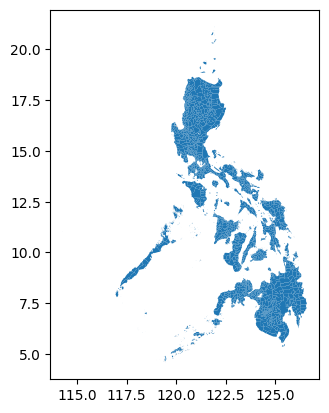

In [3]:
sf = gpd.read_file("../01_data/00_raw/01_shapefiles/PH_Adm3_MuniCities.shp/PH_Adm3_MuniCities.shp.shp")
sf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
sf.plot()

In [4]:
sf.head(10)

,adm1_psgc,adm2_psgc,adm3_psgc,adm3_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,100000000,102800000,102801000,Adams,Mun,45997,111184551,45,111.0,"POLYGON ((120.96915 18.51012, 120.95867 18.463..."
1,100000000,102800000,102802000,Bacarra,Mun,33313,55346073,33,55.0,"POLYGON ((120.66821 18.28705, 120.66441 18.282..."
2,100000000,102800000,102803000,Badoc,Mun,64985,80758428,64,80.0,"POLYGON ((120.47814 17.97717, 120.47816 17.977..."
3,100000000,102800000,102804000,Bangui,Mun,52068,115127442,52,115.0,"POLYGON ((120.81318 18.53457, 120.81358 18.533..."
4,100000000,102800000,102805000,City of Batac,City,66661,158252391,66,158.0,"POLYGON ((120.61242 18.10947, 120.612 18.10679..."
5,100000000,102800000,102806000,Burgos,Mun,54828,137203257,54,137.0,"POLYGON ((120.6707 18.53161, 120.67175 18.5271..."
6,100000000,102800000,102807000,Carasi,Mun,56958,173134875,56,173.0,"POLYGON ((120.92312 18.30378, 120.91667 18.284..."
7,100000000,102800000,102808000,Currimao,Mun,41115,33463719,41,33.0,"POLYGON ((120.48603 18.06715, 120.48652 18.067..."
8,100000000,102800000,102809000,Dingras,Mun,55309,108434465,55,108.0,"POLYGON ((120.73328 18.13173, 120.73348 18.131..."
9,100000000,102800000,102810000,Dumalneg,Mun,40939,66780135,40,66.0,"POLYGON ((120.88929 18.47631, 120.88044 18.454..."


## Filter Province

Get PSGC Codes for Selected Province

In [4]:
prov_psgc = helpers.get_prov_code(province)

prov_psgc

502000000

Get PSGC Codes for Municipalities in Province

In [ ]:
mun_pgsc = helpers.get_mun_codes(int(prov_psgc))

mun_pgsc.values

ValueError: invalid literal for int() with base 10: 'Catanduanes'

In [ ]:
# load csv file
df_psgc_mun = pd.read_csv('../01_data/00_raw/02_psgc_codes/PH_Adm3_MuniCities.csv')

# filter dataframe
df_psgc_mun = df_psgc_mun[df_psgc_mun['adm2_psgc'] == prov_psgc]
mun_pgsc = df_psgc_mun['adm3_psgc']

df_psgc_mun.head(10)

Get all Rows that match the PSGC Code

In [ ]:
sf_filtered = sf[sf['adm3_psgc'].isin(mun_pgsc)]

sf_filtered.head(10)

In [ ]:
sf_filtered.plot()

Export to File

In [ ]:
os.mkdir(f"../01_data/01_processed/02_filtered_shapefiles/{province}")

sf_filtered.to_file(f"../01_data/01_processed/02_filtered_shapefiles/{province}/{province}.shp")